In [1]:
pip install -U fortran-magic

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.7/dist-packages (0.7)


In [2]:

%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/me.jpg?raw=true" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [3]:
assert ran_the_first_cell, "Oh noes!"#preguntar

In [4]:
# l = [1, 'two', 3.0, 4, 5.0, "six"]
# l

lista = [6, 'Seven', 7.2, 8, 8.0, "ten"]
lista

[6, 'Seven', 7.2, 8, 8.0, 'ten']

In [5]:
# Lists can be indexed like C-style arrays.
# first = l[0]
# second = l[1]
# print("first:", first)
# print("second:", second)

primero = lista[0]
segundo= lista[1]
print("primero:", primero)
print("segundo:", segundo)

primero: 6
segundo: Seven


In [6]:
# Negative indexing gives elements relative to the end of the list.
# last = l[-1]
# penultimate = l[-2]
# print("last:", last)
# print("second to last:", penultimate)

ultimo = lista[-1]
penultimo = lista[-2]
print("ultimo:", ultimo)
print("penultmo:", penultimo)

ultimo: ten
penultmo: 8.0


In [7]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
# sublist = l[1:3]
# sublist

sublista = lista[2:6]
sublista

[7.2, 8, 8.0, 'ten']

In [8]:
# l[:N] is equivalent to l[0:N].
# first_three = l[:3]
# first_three

primeros_tres = lista[:3]
primeros_tres

[6, 'Seven', 7.2]

In [9]:
# l[3:] is equivalent to l[3:len(l)].
# after_three = l[3:]
# after_three

despues_tres = lista[3:]
despues_tres

[8, 8.0, 'ten']

In [10]:
# There's also a third parameter, "step", which gets every Nth element.
# l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
# l[1:7:2]

lista = ['hola', 'soy', 'una', 'lista', 'de', 'palabras', 'y','voy']
lista[1:8:3]

['soy', 'de', 'voy']

In [11]:
# This is a cute way to reverse a list.
# l[::-1]

lista[::-1]

['voy', 'y', 'palabras', 'de', 'lista', 'una', 'soy', 'hola']

In [12]:
# Lists can be grown efficiently (in O(1) amortized time).
# l = [1, 2, 3, 4, 5]
# print("Before:", l)
# l.append('six')
# print("After:", l)

lista = [6, 3, 'hola', 1, 5.7]
print("antes:", lista)
lista.append('veinte')
print("Despues:", lista)

antes: [6, 3, 'hola', 1, 5.7]
Despues: [6, 3, 'hola', 1, 5.7, 'veinte']


In [13]:
# Comprehensions let us perform elementwise computations.
# l = [1, 2, 3, 4, 5]
# [x * 2 for x in l]

lista = [6, 2.2, 'lista', 4, 'hola']
[x * 2 for x in lista]
# print('hola'*2)

[12, 4.4, 'listalista', 8, 'holahola']

**Nota:** si multiplicamos un string lo que haces es ponerlo dos veces

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [14]:
# Dictionaries are key-value mappings.
# philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
# philosophers

pais_cap = {'colombia': 'bogota', 'mexico': 'ciudad de mexico', 'bolivia': 'la paz'}
pais_cap

{'bolivia': 'la paz', 'colombia': 'bogota', 'mexico': 'ciudad de mexico'}

In [15]:
# Like lists, dictionaries are size-mutable.
# philosophers['Ludwig'] = 'Wittgenstein'
# philosophers

pais_cap['Argentina'] = 'Buenos Aires'
pais_cap

{'Argentina': 'Buenos Aires',
 'bolivia': 'la paz',
 'colombia': 'bogota',
 'mexico': 'ciudad de mexico'}

In [16]:
# del philosophers['David']
# philosophers

del pais_cap['colombia']
pais_cap

{'Argentina': 'Buenos Aires',
 'bolivia': 'la paz',
 'mexico': 'ciudad de mexico'}

In [17]:
# No slicing.
# philosophers['Bertrand':'Immanuel']

# pais_cap['colombia':'bogota']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/pacino.gif?raw=true" alt="Drawing" style="width: 100%;"/></center>


In [18]:
# # Suppose we have some matrices...
# a = [[1, 2, 3],
#      [2, 3, 4],
#      [5, 6, 7],
#      [1, 1, 1]]

# b = [[1, 2, 3, 4],
#      [2, 3, 4, 5]]

c = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9],
     [10, 11, 12]]

d = [[13, 24, 35, 46],
     [20, 39, 48, 57]]

In [19]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/gross.gif?raw=true" alt="Drawing" style="width: 50%;"/></center>


In [20]:
%%time

matmul(c, d)

CPU times: user 30 µs, sys: 7 µs, total: 37 µs
Wall time: 41.5 µs


[[53, 102, 131, 160],
 [152, 291, 380, 469],
 [251, 480, 629, 778],
 [350, 669, 878, 1087]]

In [21]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.4117264166497244, 0.1408361412529474, 0.9038676619737915],
 [0.5519059229896717, 0.6754947869032323, 0.7732768117165588]]

In [22]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 8.89 s, sys: 24.2 ms, total: 8.92 s
Wall time: 8.94 s


In [23]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))#zip convierte un par de lista en una lista de pares

In [24]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [25]:
# list_data = [float(i) for i in range(100000)]
# array_data = np.array(list_data)
lista_datos = [float(i) for i in range(100000)]
arreglo_datos = np.array(lista_datos)

In [26]:
%%time
python_dot_product(lista_datos, lista_datos)

CPU times: user 13.2 ms, sys: 0 ns, total: 13.2 ms
Wall time: 13.6 ms


333328333350000.0

In [27]:
%%time
fortran_dot_product(arreglo_datos, arreglo_datos) # 40 veces mas rapido

CPU times: user 203 µs, sys: 0 ns, total: 203 µs
Wall time: 211 µs


333328333350000.0

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/sloth.gif?raw=true" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [28]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([5, 2, 38, 10], [9, 5 + 8j, 9.0, 'ten'])
#[type(x) for x in _]

[45, (10+16j), 342.0, 'tentententententententententen']

In [29]:
# Interpretation overhead.
# source_code = 'a + b * c'
# bytecode = compile(source_code, '', 'eval')

codigo_fuente = 'x - y / z'
bytecode = compile(codigo_fuente, '', 'eval')
import dis; 
dis.dis(bytecode)

  1           0 LOAD_NAME                0 (x)
              2 LOAD_NAME                1 (y)
              4 LOAD_NAME                2 (z)
              6 BINARY_TRUE_DIVIDE
              8 BINARY_SUBTRACT
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/runaway.gif?raw=true" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/thisisfine.gif?raw=true" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [30]:
import numpy as np

# data = np.array([1, 2, 3, 4])
# data

dato = np.array([19, 28, 37, 46])
dato

array([19, 28, 37, 46])

In [31]:
# data + data
dato + dato

array([38, 56, 74, 92])

In [32]:
%%time
# Naive dot product
(arreglo_datos * arreglo_datos).sum()

CPU times: user 497 µs, sys: 0 ns, total: 497 µs
Wall time: 813 µs


333328333350000.0

In [33]:
%%time
# Built-in dot product.
arreglo_datos.dot(arreglo_datos)#en el video esta opracion se hace en 0 ns, aqui varia, en este caso lo hizo en 218

CPU times: user 149 µs, sys: 4.01 ms, total: 4.16 ms
Wall time: 4.8 ms


333328333350000.0

In [34]:
%%time
fortran_dot_product(arreglo_datos, arreglo_datos)

CPU times: user 206 µs, sys: 9 µs, total: 215 µs
Wall time: 222 µs


333328333350000.0

In [35]:
# Numpy won't allow us to write a string into an int array.
# data[0] = "foo"
# dato[0] = "no se peude escribir un string"

In [36]:
# We also can't grow an array once it's created.
# data.append(3)

# dato.append(2)


In [37]:
# We **can** reshape an array though.
# two_by_two = data.reshape(2, 2)
# two_by_two

re_array = dato.reshape(2, 2)
re_array

array([[19, 28],
       [37, 46]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [38]:
# arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
# print("Array:\n", arr, sep='')
# print("===========")
# print("DType:", arr.dtype)
# print("Shape:", arr.shape)
# print("Strides:", arr.strides)
# print("Data:", arr.data.tobytes())

arreglo = np.array([19, 29, 38, 47, 56, 65,43,27,85], dtype='int16').reshape(3, 3)
print("Arreglo pasado a 3x3:\n", arreglo, sep='')
print("tipo de dato:", arreglo.dtype)
print("forma:", arreglo.shape)
print("Strides:", arreglo.strides)
print("dato:", arreglo.data.tobytes())

Arreglo pasado a 3x3:
[[19 29 38]
 [47 56 65]
 [43 27 85]]
tipo de dato: int16
forma: (3, 3)
Strides: (6, 2)
dato: b'\x13\x00\x1d\x00&\x00/\x008\x00A\x00+\x00\x1b\x00U\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [39]:
# data = np.arange(15).reshape(3, 5)
# data

dato = np.arange(12).reshape(4, 3)
dato

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [40]:
# Binary operators.
# data * data

dato * dato

array([[  0,   1,   4],
       [  9,  16,  25],
       [ 36,  49,  64],
       [ 81, 100, 121]])

In [41]:
# Unary functions.
# np.sqrt(data)

np.sqrt(dato)

array([[0.        , 1.        , 1.41421356],
       [1.73205081, 2.        , 2.23606798],
       [2.44948974, 2.64575131, 2.82842712],
       [3.        , 3.16227766, 3.31662479]])

In [42]:
# Comparison operations
# (data % 3) == 0

(dato%5)==0

array([[ True, False, False],
       [False, False,  True],
       [False, False, False],
       [False,  True, False]])

In [43]:
# Boolean combinators.
((dato % 2) == 0) & ((dato % 3) == 0)

array([[ True, False, False],
       [False, False, False],
       [ True, False, False],
       [False, False, False]])

In [44]:
# as of python 3.5, @ is matrix-multiply
# data @ data.T

dato @ dato.T

array([[  5,  14,  23,  32],
       [ 14,  50,  86, 122],
       [ 23,  86, 149, 212],
       [ 32, 122, 212, 302]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [45]:
import math as mt

In [46]:
# sines = np.sin(np.linspace(0, 3.14, 10))
# cosines = np.cos(np.linspace(0, 3.14, 10))
# sines

senos = np.sin(np.linspace(0, mt.pi, 9))
cosenos = np.cos(np.linspace(0,mt.pi, 9))
print(senos)
# print(cosenos)

[0.00000000e+00 3.82683432e-01 7.07106781e-01 9.23879533e-01
 1.00000000e+00 9.23879533e-01 7.07106781e-01 3.82683432e-01
 1.22464680e-16]


In [47]:
# Slicing works with the same semantics as Python lists.
# sines[0]

senos[1]

0.3826834323650898

In [48]:
# sines[:3]  # First three elements  

senos[:7]

array([0.        , 0.38268343, 0.70710678, 0.92387953, 1.        ,
       0.92387953, 0.70710678])

In [49]:
# sines[5:]  # Elements from 5 on.

senos[3:]

array([9.23879533e-01, 1.00000000e+00, 9.23879533e-01, 7.07106781e-01,
       3.82683432e-01, 1.22464680e-16])

In [50]:
# sines[::2]  # Every other element.

senos[::3]

array([0.        , 0.92387953, 0.70710678])

In [51]:
# More interesting: we can index with boolean arrays to filter by a predicate.
# print("sines:\n", sines)
# print("sines > 0.5:\n", sines > 0.5)
# print("sines[sines > 0.5]:\n", sines[sines > 0.5])

print("senos:\n", senos)
print("senos > 0.5:\n", senos > .9)
print("senos[senos > 0.5]:\n", senos[senos > .3])

senos:
 [0.00000000e+00 3.82683432e-01 7.07106781e-01 9.23879533e-01
 1.00000000e+00 9.23879533e-01 7.07106781e-01 3.82683432e-01
 1.22464680e-16]
senos > 0.5:
 [False False False  True  True  True False False False]
senos[senos > 0.5]:
 [0.38268343 0.70710678 0.92387953 1.         0.92387953 0.70710678
 0.38268343]


In [52]:
# We index with lists/arrays of integers to select values at those indices.
# print(sines)
# sines[[0, 4, 7]]

print(cosenos)
cosenos[[1, 2, 3]]

[ 1.00000000e+00  9.23879533e-01  7.07106781e-01  3.82683432e-01
  6.12323400e-17 -3.82683432e-01 -7.07106781e-01 -9.23879533e-01
 -1.00000000e+00]


array([0.92387953, 0.70710678, 0.38268343])

In [53]:
# Index arrays are often used for sorting one or more arrays.
# unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

datos_desordenados = np.array([1, 9, 5, 23, -5, 6, 22])

In [54]:
# sort_indices = np.argsort(unsorted_data)
# sort_indices

ind_ord = np.argsort(datos_desordenados)
ind_ord

array([4, 0, 2, 5, 1, 6, 3])

In [55]:
# unsorted_data[sort_indices]

datos_desordenados[ind_ord]

array([-5,  1,  5,  6,  9, 22, 23])

In [56]:
# market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
# assets = np.array(['A', 'B', 'C', 'D', 'E'])

mc = np.array([65, 63, 101, 57, 63])
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [57]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mc = np.argsort(mc)
assets[sort_by_mc]

array(['D', 'B', 'E', 'A', 'C'], dtype='<U1')

In [58]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [59]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [60]:
# data = np.arange(25).reshape(5, 5)
# data

dato = np.arange(63).reshape(7, 9)
dato

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62]])

In [61]:
# data[:2, :2]  # First two rows and first two columns.

dato[:3, :7]

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 9, 10, 11, 12, 13, 14, 15],
       [18, 19, 20, 21, 22, 23, 24]])

In [62]:
# data[:2, [0, -1]]  # First two rows, first and last columns.

dato[:7,[3,-1]]

array([[ 3,  8],
       [12, 17],
       [21, 26],
       [30, 35],
       [39, 44],
       [48, 53],
       [57, 62]])

In [63]:
# data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

dato[(dato[:,5]%2)==0]

array([[ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [45, 46, 47, 48, 49, 50, 51, 52, 53]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [64]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [65]:
# variance(np.random.standard_normal(1000))

variance(np.random.standard_normal(2000))

0.9749488807405243

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [66]:
# data = np.arange(30)
# data.mean()

dato = np.arange(100)
dato.mean()

49.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [67]:
# data = np.arange(30).reshape(3, 10)
# data

dato = np.arange(28).reshape(7, 4)
dato

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27]])

In [68]:
# data.mean()

dato.mean()

13.5

In [69]:
# data.mean(axis=0)

print(dato.mean(axis=0))

[12. 13. 14. 15.]


In [70]:
# data.mean(axis=1)

dato.mean(axis=1)

array([ 1.5,  5.5,  9.5, 13.5, 17.5, 21.5, 25.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [71]:
# row = np.array([1, 2, 3, 4])
# column = np.array([[1], [2], [3]])
# print("Row:\n", row, sep='')
# print("Column:\n", column, sep='')

fila = np.array([9, 22, 5, 76])
columna = np.array([[14], [22], [33]])
print("fila:", fila, sep='')
print("columna:", columna, sep='')

fila:[ 9 22  5 76]
columna:[[14]
 [22]
 [33]]


In [72]:
# row + column

fila + columna

array([[ 23,  36,  19,  90],
       [ 31,  44,  27,  98],
       [ 42,  55,  38, 109]])

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/broadcasting.png?raw=true" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [73]:
# Broadcasting is particularly useful in conjunction with reductions.
# print("Data:\n", data, sep='')
# print("Mean:\n", data.mean(axis=0), sep='')
# print("Data - Mean:\n", data - data.mean(axis=0), sep='')

print("dato:\n", dato, sep='')
print("media:\n", dato.mean(axis=0), sep='')
print("dato - Mean:\n", dato - dato.mean(axis=0), sep='')

dato:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]]
media:
[12. 13. 14. 15.]
dato - Mean:
[[-12. -12. -12. -12.]
 [ -8.  -8.  -8.  -8.]
 [ -4.  -4.  -4.  -4.]
 [  0.   0.   0.   0.]
 [  4.   4.   4.   4.]
 [  8.   8.   8.   8.]
 [ 12.  12.  12.  12.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/unicorn.jpg?raw=true" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/panda-wrangling.gif?raw=true" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/pandas_logo.png?raw=true" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [74]:
# s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
# s

s = pd.Series(index=['z', 'x', 'y', 'v', 'w'], data=[45, 12, 74, 84, 19])
print(s, type(s))

z    45
x    12
y    74
v    84
w    19
dtype: int64 <class 'pandas.core.series.Series'>


In [75]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['z', 'x', 'y', 'v', 'w'], dtype='object')
The values are: [45 12 74 84 19]


In [76]:
# We can look up values out of a Series by position...
# s.iloc[0]
s.iloc[3]

84

In [77]:
# ... or by label.
# s.loc['a']

s.loc['w']

19

In [78]:
# Slicing works as expected...
# s.iloc[:2]

s.iloc[:3]


z    45
x    12
y    74
dtype: int64

In [79]:
# ...but it works with labels too!
s.loc[:'y']

z    45
x    12
y    74
dtype: int64

In [80]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

z    45
w    19
dtype: int64

In [81]:
# As does boolean masking.
# s.loc[s > 2]

s.loc[s > 1]

z    45
x    12
y    74
v    84
w    19
dtype: int64

In [82]:
# Element-wise operations are aligned by index.
# other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
# other_s

other_s = pd.Series({'y': 53.7, 'b': 78.3, 'x': 12.4, 'd': 82.2})
other_s

y    53.7
b    78.3
x    12.4
d    82.2
dtype: float64

In [83]:
s + other_s

b      NaN
d      NaN
v      NaN
w      NaN
x     24.4
y    127.7
z      NaN
dtype: float64

In [84]:
# We can fill in missing values with fillna().
# (s + other_s).fillna(0.0)

(s + other_s).fillna(458.23)

b    458.23
d    458.23
v    458.23
w    458.23
x     24.40
y    127.70
z    458.23
dtype: float64

In [85]:
import pandas_datareader as pdr
import datetime

In [86]:
# Most real datasets are read in from an external file format.
# import pandas_datareader as pdr
# aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')

aapl = pdr.get_data_yahoo('AAPL',start=datetime.datetime(2020,1,4),end=datetime.datetime(2021,2,1))
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.630219
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.803459


In [87]:
# Slicing generalizes to two dimensions as you'd expect:
# aapl.iloc[:2, :2]

aapl.iloc[:3, :6]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385


In [88]:
# aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

aapl.loc[pd.Timestamp('2020-02-01'):pd.Timestamp('2021-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2020-02-03,77.165001,173985600.0
2020-02-04,79.712502,136616400.0
2020-02-05,80.362503,118826800.0
2020-02-06,81.302498,105425600.0
2020-02-07,80.007500,117684000.0
...,...,...
2021-01-26,143.160004,98390600.0
2021-01-27,142.059998,140843800.0
2021-01-28,137.089996,142621100.0


# Rolling Operations

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/rolling.gif?raw=true" alt="Drawing" style="width: 75%;"/></center>

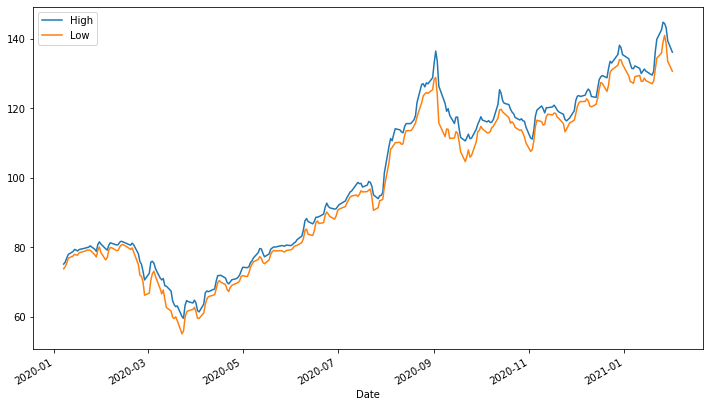

In [89]:
# aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

aapl.rolling(2)[['High', 'Low']].mean().plot();

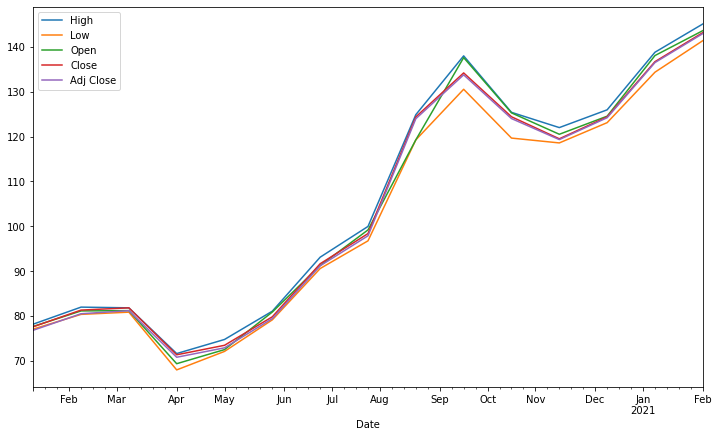

In [90]:
# Drop `Volume`, since it's way bigger than everything else.
# aapl.drop('Volume', axis=1).resample('2W').max().plot();

aapl.drop('Volume', axis=1).resample('4W').max().plot();#W de weeks

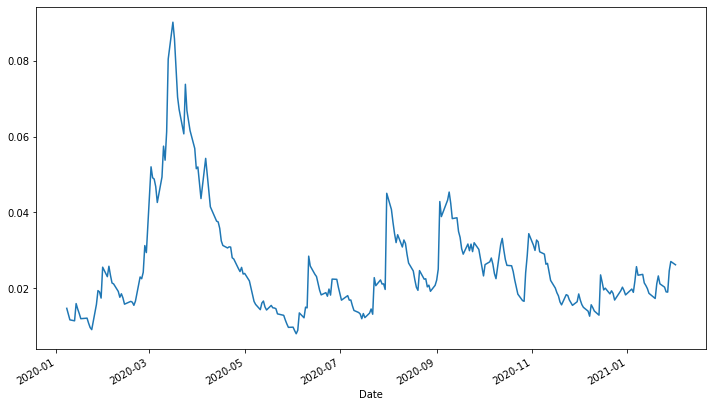

In [91]:
# 30-day rolling exponentially-weighted stddev of returns.
# aapl['Close'].pct_change().ewm(span=30).std().plot();

aapl['Close'].pct_change().ewm(span=10).std().plot();#ewn exponencial


# "Real World" Data

In [92]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [93]:
# from demos.avocados import read_avocadata
# import read_avocadata

# avocados = read_avocadata('2014', '2016')
# avocados.head()

avocados = read_avocadata('2014', '2015')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


para el ejemplo de bajar los datos de la pagina del gobierno mi idea era descargar el csv y ponerlo en github sin embargo me decia que es muy pesado por lo que vamos a usar la api, en este caso los datos son del consumo de agua en bogota 

In [94]:
water = pd.read_csv('https://www.datos.gov.co/resource/3dma-ihgq.csv')
water.head()

,tipo_de_usuario,estrato_de_la_vivienda,consumo_julio_2020,consumo_agosto_2020,consumo_septiembre_2020,consumo_octubre_2020,consumo_noviem_2020,consumo_diciembre_2020,promedio
0,RESIDENCIAL,ESTRATO 1,30,1,1,3,3,23,10.166667
1,RESIDENCIAL,ESTRATO 2,0,0,1,0,2,0,0.500000
2,RESIDENCIAL,ESTRATO 2,31,10,8,19,8,46,20.333333
3,RESIDENCIAL,ESTRATO 2,14,9,8,26,5,19,13.500000
4,RESIDENCIAL,ESTRATO 2,39,22,0,0,0,6,11.166667


In [95]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [96]:
water.dtypes

tipo_de_usuario             object
estrato_de_la_vivienda      object
consumo_julio_2020           int64
consumo_agosto_2020          int64
consumo_septiembre_2020      int64
consumo_octubre_2020         int64
consumo_noviem_2020          int64
consumo_diciembre_2020       int64
promedio                   float64
dtype: object

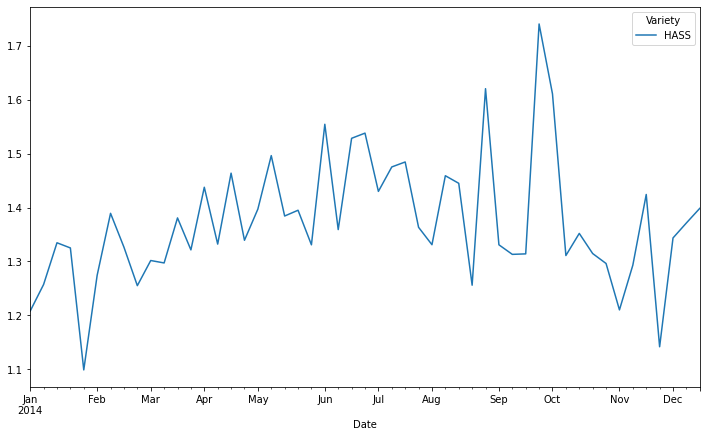

In [97]:
# What's the regional average price of a HASS avocado every day?
# hass = avocados[avocados.Variety == 'HASS']
# hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Variety'])['Weighted Avg Price'].mean().unstack().ffill().plot();

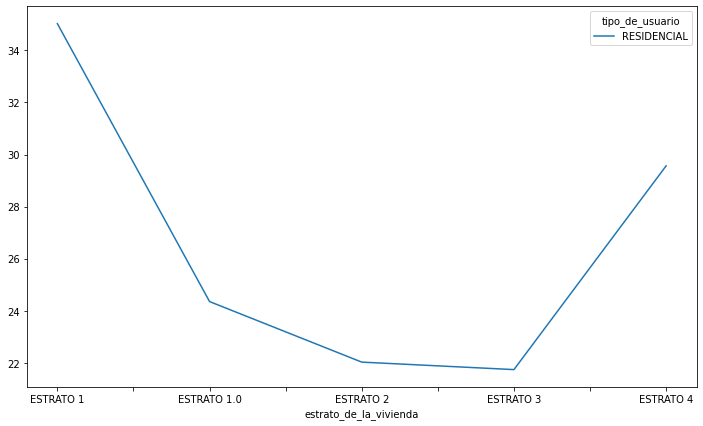

In [98]:
residencial = water[water.tipo_de_usuario == 'RESIDENCIAL']
residencial.groupby(['estrato_de_la_vivienda', 'tipo_de_usuario'])['promedio'].mean().unstack().ffill().plot();

In [99]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

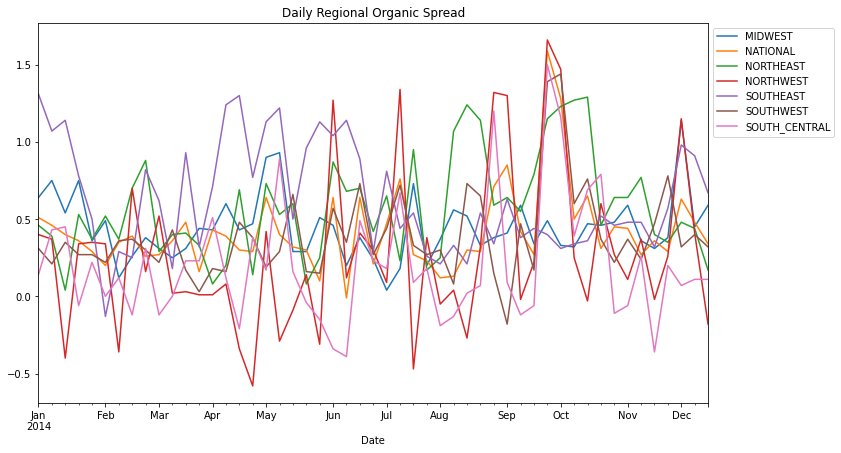

In [100]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [101]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,
MIDWEST,1.000000,0.105442,0.035815,-0.025065,0.399145,-0.156167,0.056501
NATIONAL,0.105442,1.000000,0.359725,0.715700,-0.015011,0.609023,0.669836
NORTHEAST,0.035815,0.359725,1.000000,0.243974,-0.245027,0.494572,0.182994
NORTHWEST,-0.025065,0.715700,0.243974,1.000000,-0.130307,0.316273,0.412592
SOUTHEAST,0.399145,-0.015011,-0.245027,-0.130307,1.000000,-0.195298,-0.085666
SOUTHWEST,-0.156167,0.609023,0.494572,0.316273,-0.195298,1.000000,0.467151
SOUTH_CENTRAL,0.056501,0.669836,0.182994,0.412592,-0.085666,0.467151,1.000000


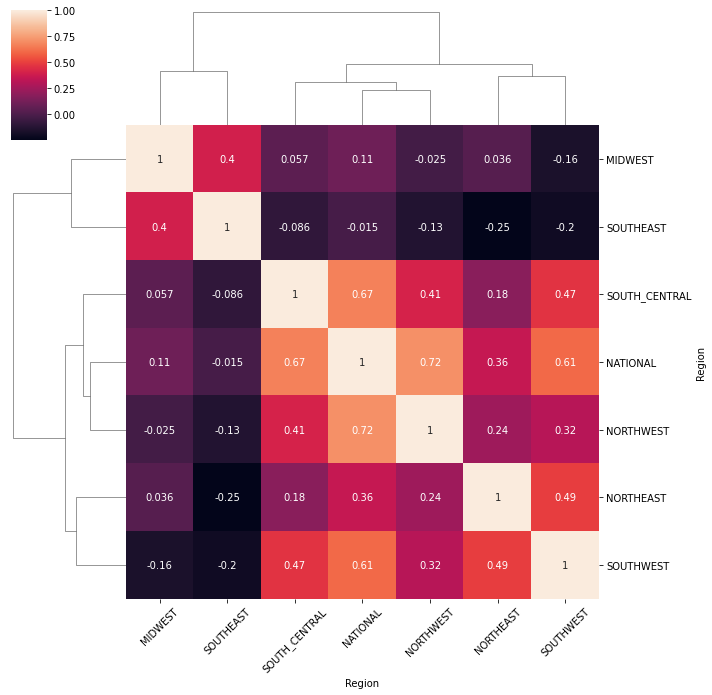

In [102]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!